# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [39]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [40]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [41]:
tab = pd.crosstab(df['sex'],df['flag_doente'],margins=True)

tab['média de doentes'] = tab['All']/tab[1]

tab['Odds'] = tab[1]/tab[0]

tab['Odds_ratio'] = tab['Odds']/tab.loc['All','Odds']

tab['log_odds'] = np.log(tab['Odds'])

tab['log_odds_ratio'] = np.log(tab['Odds_ratio'])
tab

flag_doente,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
sex,,,,,,,,
0.0,72,25,97,3.880000,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,1.807018,1.239130,1.461996,0.214410,0.379802
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


---

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [42]:
df['faixa_idade'], bins = pd.qcut(df['age'], q=5, labels=False, retbins=True)
tab2 = pd.crosstab(df['faixa_idade'], df['flag_doente'], margins=True)

tab2['média de doentes'] = tab2['All']/tab2[1]

tab2['Odds'] = tab2[1]/tab2[0]

tab2['Odds_ratio'] = tab2['Odds']/tab2.loc['All','Odds']

tab2['log_odds'] = np.log(tab2['Odds'])

tab2['log_odds_ratio'] = np.log(tab2['Odds_ratio'])
tab2

flag_doente,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
faixa_idade,,,,,,,,
0,47,16,63,3.937500,0.340426,0.401653,-1.077559,-0.912166
1,42,22,64,2.909091,0.523810,0.618020,-0.646627,-0.481235
2,32,39,71,1.820513,1.218750,1.437950,0.197826,0.363218
3,13,32,45,1.406250,2.461538,2.904261,0.900787,1.066179
4,30,30,60,2.000000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


In [43]:
# for i in range(len(bins) - 1):
#     print(f"Faixa {i}: {bins[i]} a {bins[i + 1]}")

In [44]:
media = df['age'].mean().round(1)
print(f'A média de idade é: {media}')

A média de idade é: 54.4


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

### Visualização das informações do exercício 1.

In [45]:
import matplotlib.pyplot as plt

data = {
    '0': [72, 92, 164],
    '1': [25, 114, 139],
    'média de doentes': [3.880000, 1.807018, 2.179856],
    'Odds': [0.347222, 1.239130, 0.847561],
    'Odds_ratio': [0.409672, 1.461996, -0.165392],
    'log_odds': [-1.057790, 0.214410, 0.000000],
    'log_odds_ratio': [-0.892398, 0.379802, 0.000000]
}

df = pd.DataFrame(data)
df

,0,1,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
0,72,25,3.880000,0.347222,0.409672,-1.05779,-0.892398
1,92,114,1.807018,1.239130,1.461996,0.21441,0.379802
2,164,139,2.179856,0.847561,-0.165392,0.00000,0.000000


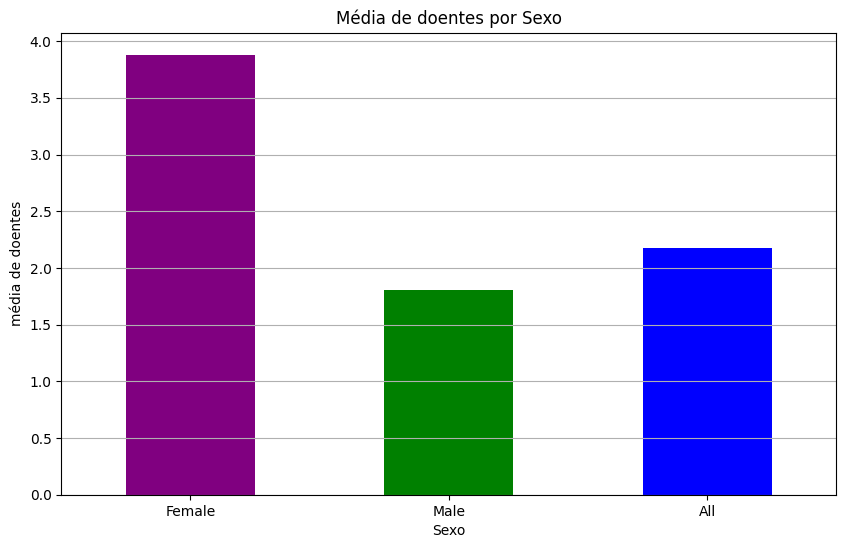

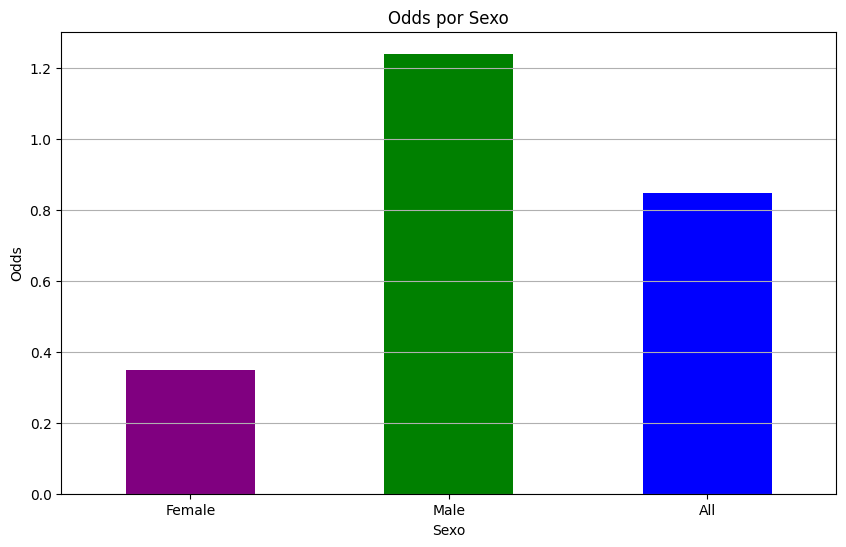

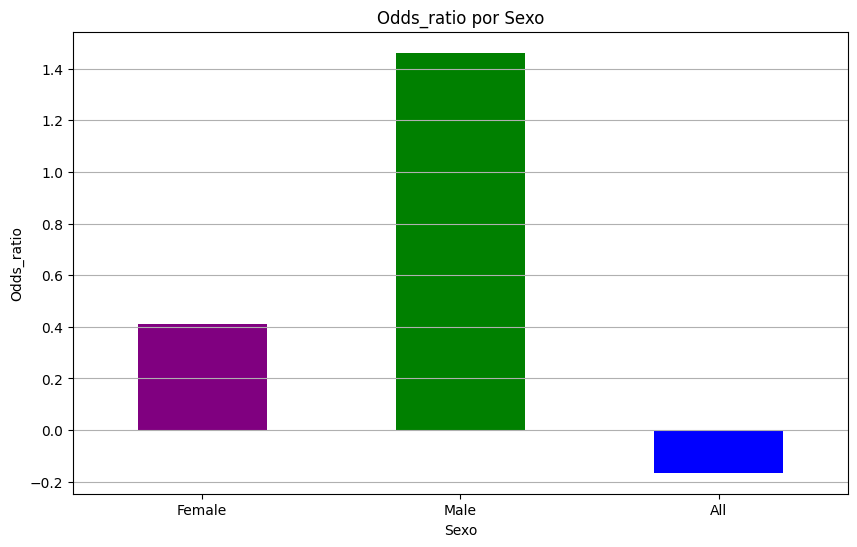

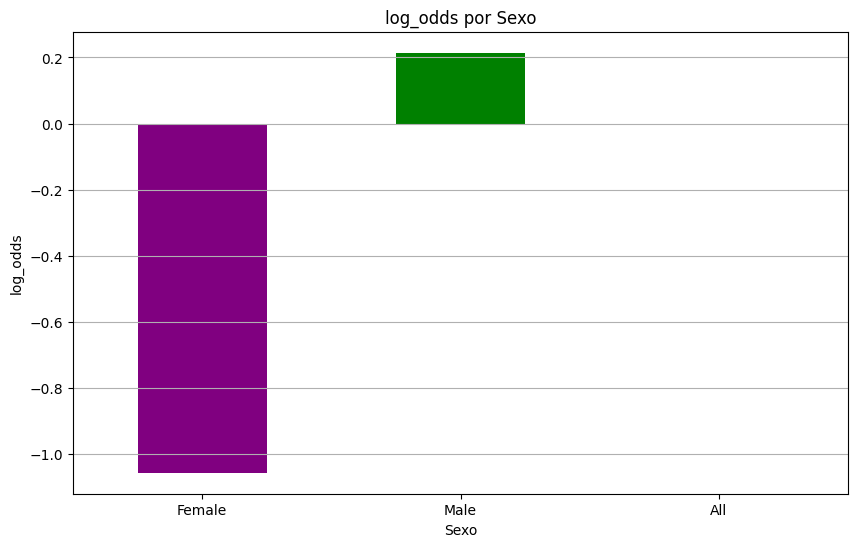

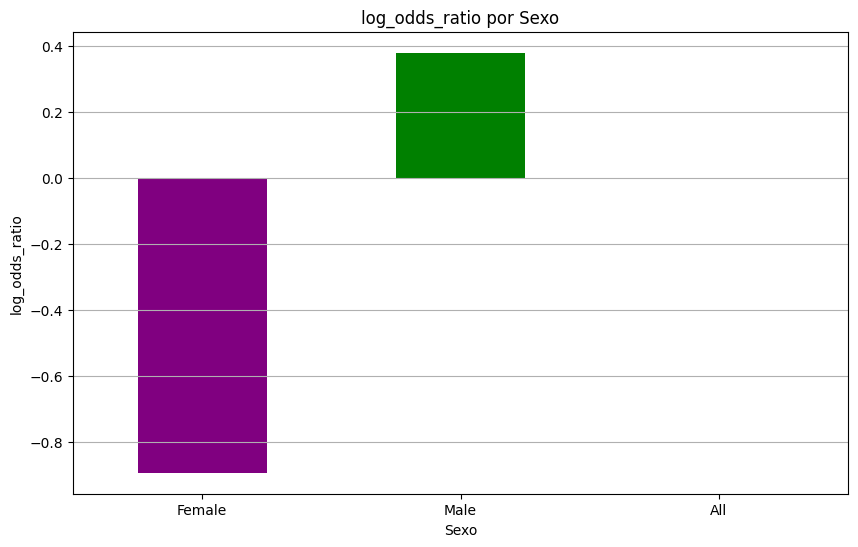

In [46]:
plt.figure(figsize=(10, 6))
df['média de doentes'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'All'], rotation=0)
plt.title('Média de doentes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('média de doentes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
df['Odds'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'All'], rotation=0)
plt.title('Odds por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Odds')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(10, 6))
df['Odds_ratio'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'All'], rotation=0)
plt.title('Odds_ratio por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Odds_ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
df['log_odds'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'All'], rotation=0)
plt.title('log_odds por Sexo')
plt.xlabel('Sexo')
plt.ylabel('log_odds')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
df['log_odds_ratio'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'All'], rotation=0)
plt.title('log_odds_ratio por Sexo')
plt.xlabel('Sexo')
plt.ylabel('log_odds_ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

---

### Visualização das informações do exercício 2.

**Faixa de Idade**

- Faixa 0: 29.0 a 45.0
- Faixa 1: 45.0 a 53.0
- Faixa 2: 53.0 a 58.0
- Faixa 3: 58.0 a 62.0
- Faixa 4: 62.0 a 77.0

In [47]:
data = {
    'faixa_idade': ['29 a 45', '45 a 53', '53 a 58', '58 a 62', '62 a 77', 'All'],
    '0': [47, 42, 32, 13, 30, 164],
    '1': [16, 22, 39, 32, 30, 139],
    'All': [63, 64, 71, 45, 60, 303],
    'média de doentes': [3.937500, 2.909091, 1.820513, 1.406250, 2.000000, 2.179856],
    'Odds': [0.340426, 0.523810, 1.218750, 2.461538, 1.000000, 0.847561],
    'Odds_ratio': [0.401653, 0.618020, 1.437950, 2.904261, 1.179856, 1.000000],
    'log_odds': [-1.077559, -0.646627, 0.197826, 0.900787, 0.000000, -0.165392],
    'log_odds_ratio': [-0.912166, -0.481235, 0.363218, 1.066179, 0.165392, 0.000000]
}

df = pd.DataFrame(data)
df

,faixa_idade,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
0,29 a 45,47,16,63,3.937500,0.340426,0.401653,-1.077559,-0.912166
1,45 a 53,42,22,64,2.909091,0.523810,0.618020,-0.646627,-0.481235
2,53 a 58,32,39,71,1.820513,1.218750,1.437950,0.197826,0.363218
3,58 a 62,13,32,45,1.406250,2.461538,2.904261,0.900787,1.066179
4,62 a 77,30,30,60,2.000000,1.000000,1.179856,0.000000,0.165392
5,All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


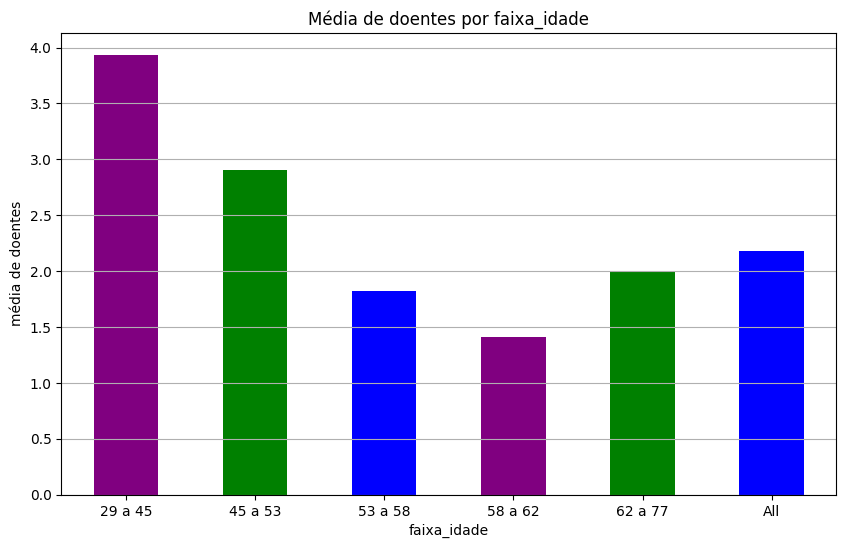

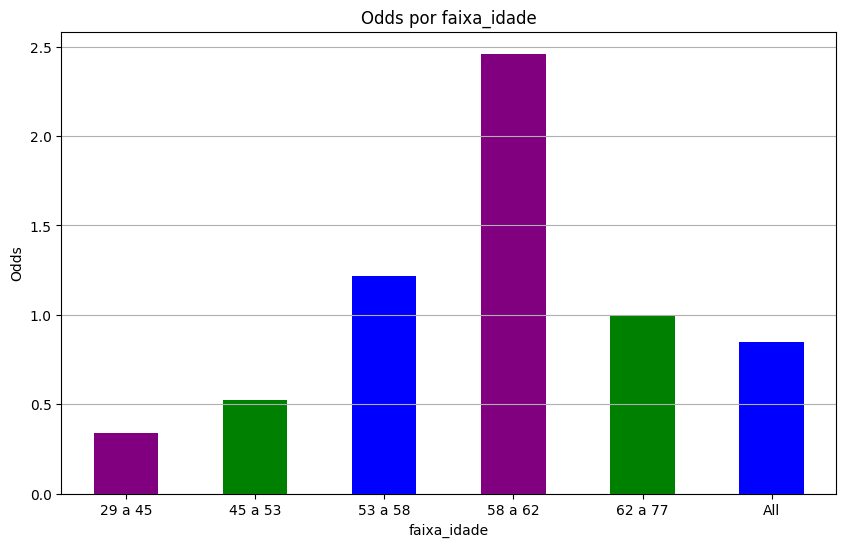

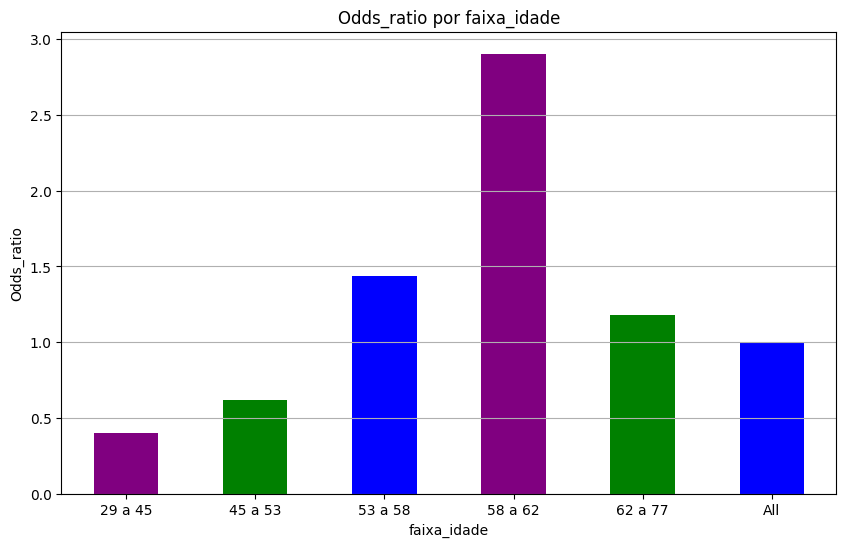

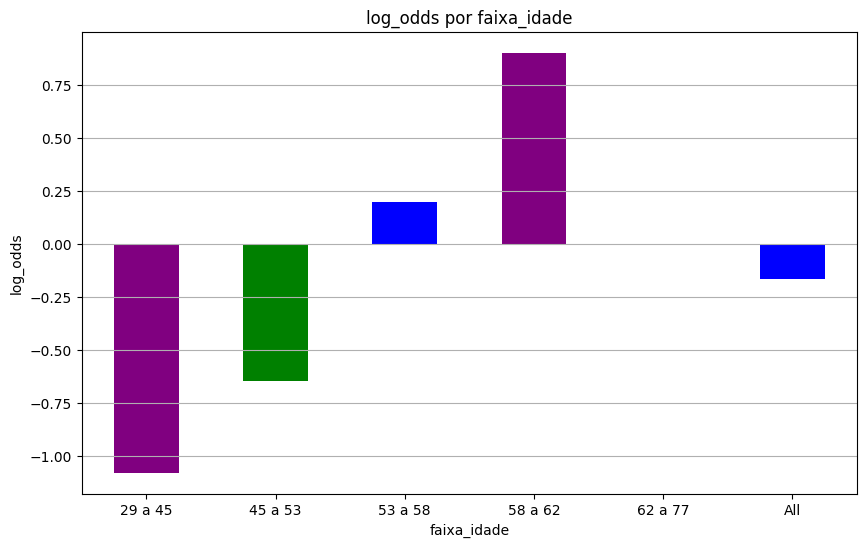

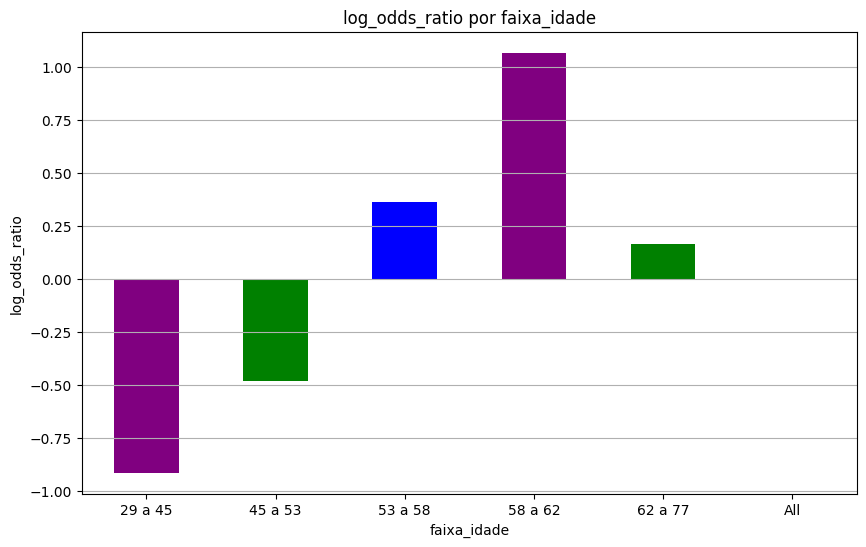

In [48]:
plt.figure(figsize=(10, 6))
df['média de doentes'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2, 3,4,5], labels=['29 a 45', '45 a 53', '53 a 58', '58 a 62', '62 a 77', 'All'], rotation=0)
plt.title('Média de doentes por faixa_idade')
plt.xlabel('faixa_idade')
plt.ylabel('média de doentes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
df['Odds'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2, 3,4,5], labels=['29 a 45', '45 a 53', '53 a 58', '58 a 62', '62 a 77', 'All'], rotation=0)
plt.title('Odds por faixa_idade')
plt.xlabel('faixa_idade')
plt.ylabel('Odds')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(10, 6))
df['Odds_ratio'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2, 3,4,5], labels=['29 a 45', '45 a 53', '53 a 58', '58 a 62', '62 a 77', 'All'], rotation=0)
plt.title('Odds_ratio por faixa_idade')
plt.xlabel('faixa_idade')
plt.ylabel('Odds_ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
df['log_odds'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2, 3,4,5], labels=['29 a 45', '45 a 53', '53 a 58', '58 a 62', '62 a 77', 'All'], rotation=0)
plt.title('log_odds por faixa_idade')
plt.xlabel('faixa_idade')
plt.ylabel('log_odds')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
df['log_odds_ratio'].plot(kind='bar', color=['purple', 'green','blue'])
plt.xticks(ticks=[0, 1, 2, 3,4,5], labels=['29 a 45', '45 a 53', '53 a 58', '58 a 62', '62 a 77', 'All'], rotation=0)
plt.title('log_odds_ratio por faixa_idade')
plt.xlabel('faixa_idade')
plt.ylabel('log_odds_ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()